In [9]:
import pandas as pd
import matplotlib.pyplot as plt


kaspa_csv = r"C:\Users\Stichting GeoFort\Documents\0. Coding\8. Data-analist\Python\Crypto\datasets\kaspa.csv"

kaspa = pd.read_csv(kaspa_csv, delimiter=";")

kaspa.head(10)

kaspa.columns

Index(['name', 'open', 'high', 'low', 'close', 'volume', 'marketCap',
       'timestamp'],
      dtype='object')

#previouscode
```python

kaspa.drop(columns=["timestamp", "name", "timeHigh"],inplace=True)

date_columns = ['timestamp', 'timeClose', 'timeHigh', 'timeLow']
for col in date_columns:
    kaspa[col] = pd.to_datetime(kaspa[col], format='ISO8601')

kaspa["timeOpen"] = pd.to_datetime(kaspa["timeOpen"], format='ISO8601')

kaspa.rename(columns={"timeOpen": "date"}, inplace=True)

kaspa.drop(columns=["timeLow"],inplace=True)

kaspa.set_index("date", inplace=True)

kaspa.reset_index(inplace=True)
kaspa["date"] = pd.to_datetime(kaspa["date"]).dt.date
kaspa.set_index("date", inplace=True)

```

In [10]:
kaspa

,name,open,high,low,close,volume,marketCap,timestamp
0,2781,0.000499,0.000560,0.000250,0.000433,7.597326e+05,0.000000e+00,2022-06-06T00:00:00.000Z
1,2781,0.000433,0.000482,0.000270,0.000317,5.806722e+05,0.000000e+00,2022-06-13T00:00:00.000Z
2,2781,0.000317,0.000599,0.000273,0.000367,5.744395e+05,0.000000e+00,2022-06-20T00:00:00.000Z
3,2781,0.000367,0.000414,0.000259,0.000300,5.305908e+05,0.000000e+00,2022-06-27T00:00:00.000Z
4,2781,0.000300,0.000330,0.000207,0.000240,4.077746e+05,0.000000e+00,2022-07-04T00:00:00.000Z
...,...,...,...,...,...,...,...,...
104,2781,0.147367,0.191860,0.144342,0.168822,8.182990e+08,4.031438e+09,2024-06-03T00:00:00.000Z
105,2781,0.168837,0.180306,0.150433,0.159683,5.300385e+08,3.823318e+09,2024-06-10T00:00:00.000Z
106,2781,0.159669,0.161713,0.135173,0.151844,4.278547e+08,3.645165e+09,2024-06-17T00:00:00.000Z
107,2781,0.151817,0.197611,0.144546,0.190473,9.662129e+08,4.584614e+09,2024-06-24T00:00:00.000Z


In [11]:
kaspa.drop(columns=["name"],inplace=True)

In [14]:
kaspa["date"] = pd.to_datetime(kaspa["timestamp"], format='ISO8601').dt.date
kaspa.set_index("date", inplace=True)
kaspa.drop(columns=["timestamp"],inplace=True)


In [15]:
kaspa

,open,high,low,close,volume,marketCap
date,,,,,,
2022-06-06,0.000499,0.000560,0.000250,0.000433,7.597326e+05,0.000000e+00
2022-06-13,0.000433,0.000482,0.000270,0.000317,5.806722e+05,0.000000e+00
2022-06-20,0.000317,0.000599,0.000273,0.000367,5.744395e+05,0.000000e+00
2022-06-27,0.000367,0.000414,0.000259,0.000300,5.305908e+05,0.000000e+00
2022-07-04,0.000300,0.000330,0.000207,0.000240,4.077746e+05,0.000000e+00
...,...,...,...,...,...,...
2024-06-03,0.147367,0.191860,0.144342,0.168822,8.182990e+08,4.031438e+09
2024-06-10,0.168837,0.180306,0.150433,0.159683,5.300385e+08,3.823318e+09
2024-06-17,0.159669,0.161713,0.135173,0.151844,4.278547e+08,3.645165e+09


In [16]:
f"{kaspa.index.min()}, {kaspa.index.max()}"

'2022-06-06, 2024-07-01'

In [17]:
close_col_pos = list(kaspa.columns).index('close') + 1


In [18]:
kaspa.insert(close_col_pos, 'Daily Return', kaspa['close'].pct_change()) #ptc change pakt het verschil met de vorige column


In [19]:
kaspa

,open,high,low,close,Daily Return,volume,marketCap
date,,,,,,,
2022-06-06,0.000499,0.000560,0.000250,0.000433,NaN,7.597326e+05,0.000000e+00
2022-06-13,0.000433,0.000482,0.000270,0.000317,-0.268025,5.806722e+05,0.000000e+00
2022-06-20,0.000317,0.000599,0.000273,0.000367,0.157076,5.744395e+05,0.000000e+00
2022-06-27,0.000367,0.000414,0.000259,0.000300,-0.182270,5.305908e+05,0.000000e+00
2022-07-04,0.000300,0.000330,0.000207,0.000240,-0.200064,4.077746e+05,0.000000e+00
...,...,...,...,...,...,...,...
2024-06-03,0.147367,0.191860,0.144342,0.168822,0.145595,8.182990e+08,4.031438e+09
2024-06-10,0.168837,0.180306,0.150433,0.159683,-0.054131,5.300385e+08,3.823318e+09
2024-06-17,0.159669,0.161713,0.135173,0.151844,-0.049091,4.278547e+08,3.645165e+09


The **Daily Return** in your DataFrame represents the percentage change in the closing price of the asset (in this case, Kaspa) from one day to the next. It shows how much the closing price has changed as a percentage relative to the previous day's closing price.

### Detailed Explanation:

#### Percentage Change Calculation:
The formula for percentage change from one value to the next is:

$$\begin{aligned}
\text{Daily Return} = \frac{\text{Close}_{\text{today}} - \text{Close}_{\text{yesterday}}}{\text{Close}_{\text{yesterday}}}
\end{aligned}$$

This can also be written as:

$$\begin{aligned}
\text{Daily Return} = \left( \frac{\text{Close}_{\text{today}}}{\text{Close}_{\text{yesterday}}} - 1 \right)
\end{aligned}$$

#### Interpreting the Daily Return:
- A **positive Daily Return** indicates that the closing price increased compared to the previous day.
- A **negative Daily Return** indicates that the closing price decreased compared to the previous day.
- A **Daily Return of 0** means that the closing price did not change from the previous day.

For example, if the closing price yesterday was $100 and the closing price today is $105, the Daily Return would be:

$$\begin{aligned}
\text{Daily Return} = \frac{105 - 100}{100} = 0.05 \text{ or } 5\%
\end{aligned}$$

### Breakdown of the Code for Calculating and Inserting the Daily Return:

1. **Calculating the Daily Return**:
    ```python
    kaspa['Daily Return'] = kaspa['close'].pct_change()
    ```

    This line calculates the percentage change in the `close` column and creates a new column `Daily Return` to store these values.

2. **Inserting the Daily Return column**:
    ```python
    close_col_pos = kaspa.columns.get_loc('close') + 1
    kaspa.insert(close_col_pos, 'Daily Return', kaspa.pop('Daily Return'))
    ```

    These lines determine the position of the `close` column and insert the `Daily Return` column right after the `close` column.

By following these steps, the `Daily Return` column will reflect the day-to-day percentage changes in the closing prices, providing a measure of daily performance.

Percentage van dagen binnen de standaardafwijking: 90.83%
Percentage van dagen buiten de standaardafwijking: 8.26%


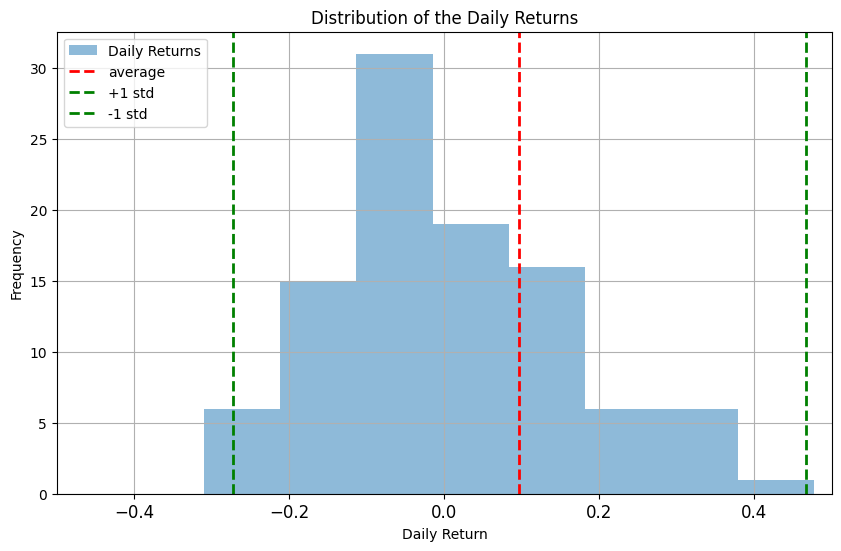

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'kaspa' is your DataFrame
# Calculate the average and standard deviation
average = kaspa['Daily Return'].mean()
std_dev = kaspa['Daily Return'].std()

# Determine threshold values for standard deviation
drempel_boven = average + std_dev
drempel_onder = average - std_dev

# Identify days within and outside threshold values
inside_std_values = kaspa[(kaspa['Daily Return'] <= drempel_boven) & (kaspa['Daily Return'] >= drempel_onder)]
outside_std_values = kaspa[(kaspa['Daily Return'] > drempel_boven) | (kaspa['Daily Return'] < drempel_onder)]

# Calculate the percentage of days within and outside the threshold
percentage_inside = (inside_std_values.shape[0] / kaspa.shape[0]) * 100
percentage_outside = (outside_std_values.shape[0] / kaspa.shape[0]) * 100
print(f"Percentage van dagen binnen de standaardafwijking: {percentage_inside:.2f}%")
print(f"Percentage van dagen buiten de standaardafwijking: {percentage_outside:.2f}%")

# Plot the results
plt.figure(figsize=(10, 6))
plt.hist(kaspa['Daily Return'], bins=30, alpha=0.5, label='Daily Returns')  # Adjusted bins for better representation
plt.axvline(average, color='r', linestyle='dashed', linewidth=2, label='average')
plt.axvline(drempel_boven, color='g', linestyle='dashed', linewidth=2, label='+1 std')
plt.axvline(drempel_onder, color='g', linestyle='dashed', linewidth=2, label='-1 std')
plt.title('Distribution of the Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)  # Added grid lines for better readability
plt.xticks(fontsize=12)  # Increased font size for x-axis labels

# Optionally zoom in on the main data range to avoid the effect of outliers
plt.xlim(-0.5, 0.5)

plt.show()


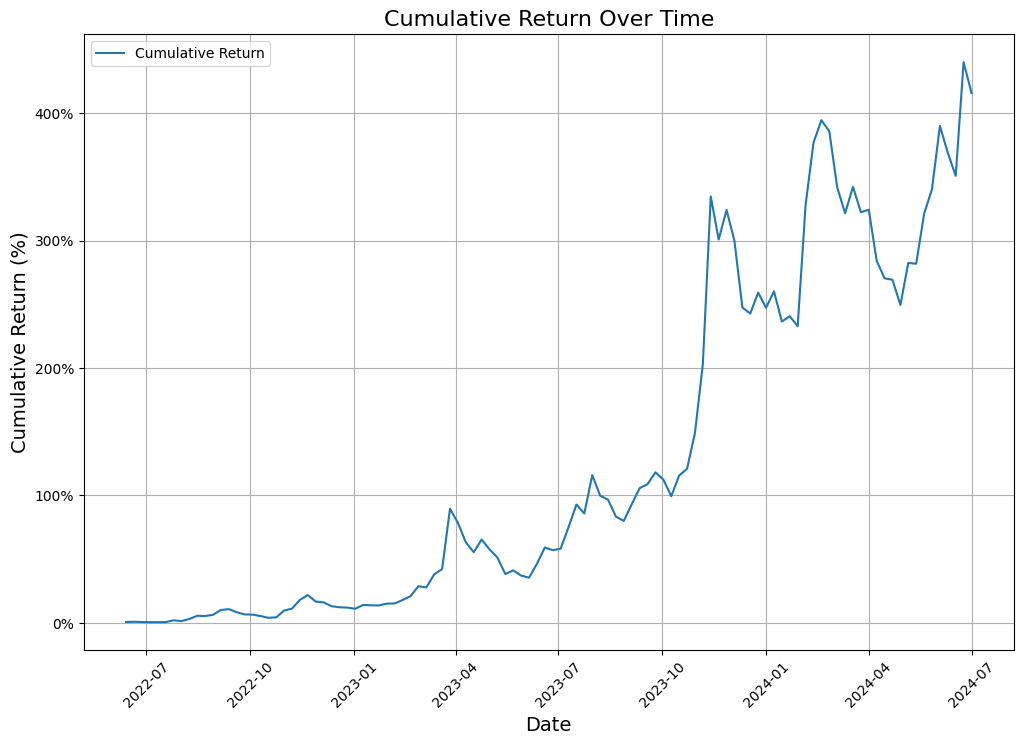

In [25]:
# Assuming 'kaspa' is your DataFrame
kaspa['Cumulative Return'] = (1 + kaspa['Daily Return']).cumprod()

plt.figure(figsize=(12, 8))
plt.plot(kaspa.index, kaspa['Cumulative Return'], label='Cumulative Return')
plt.title('Cumulative Return Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Cumulative Return (%)', fontsize=14)  # Added percentage sign
plt.legend()
plt.grid(True)

# Improve the date format on the x-axis
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m'))

# Format the y-axis to show as percentages
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}%'))

plt.show()

### Step-by-Step Explanation

#### `plt.gca()`
- `plt.gca()` stands for "get current axis". This function returns the current `Axes` instance on the current figure. If there is no current figure, it creates a new one. In this context, it is used to get access to the y-axis of the current plot.

#### `plt.gca().yaxis`
- This accesses the `yaxis` attribute of the current `Axes` instance. The `yaxis` attribute contains methods and properties for controlling the appearance and behavior of the y-axis.

#### `.set_major_formatter(...)`
- This method sets the formatter for the major ticks on the y-axis. The major ticks are the primary divisions along the axis that usually have labels.

#### `plt.FuncFormatter(...)`
- `FuncFormatter` is a class from the `matplotlib.ticker` module. It allows you to define a custom function to format the tick labels. You pass a function to `FuncFormatter` which takes two arguments (the value and the tick position) and returns a string that will be used as the label.

#### `lambda x, _: f'{x:.0f}%'`
- This is a lambda function, which is an anonymous function defined using the `lambda` keyword.
- `lambda x, _`: This lambda function takes two parameters. The first parameter `x` is the value of the tick, and the second parameter `_` is the tick position, which is not used in this function.
- `f'{x:.0f}%'`: This is an f-string (formatted string literal). It formats the value `x` as a floating-point number with no decimal places (`.0f`) and appends a percent sign `%` to it. For example, if `x` is `400`, the formatted string will be `'400%'`.

### Putting It All Together
- `plt.gca().yaxis.set_major_formatter(...)` sets the major tick labels on the y-axis using a custom formatter.
- `plt.FuncFormatter(lambda x, _: f'{x:.0f}%')` creates a formatter that converts the numeric tick values into percentage strings.

So, when the y-axis values are, for example, `100`, `200`, `300`, etc., they will be displayed as `100%`, `200%`, `300%`, etc., on the plot. This makes it clear that the values represent cumulative returns as percentages.




### Cumulative Return Formula Explanation

#### Formula:
$$\begin{aligned}
\text{Cumulative Return} = \prod_{t=1}^{T} (1 + r_t) - 1
\end{aligned}$$

- \( \prod \) denotes the product over a range of terms.
- \( T \) is the total number of periods (days in this case).
- \( r_t \) is the daily return for day \( t \).

#### Steps:
1. **Adding 1 to Daily Return**: When calculating the cumulative return, we start with an initial value of 1 (representing 100% of the initial investment). For each day, we multiply by (1 + daily return) to compound the return.
   - If the daily return is positive (e.g., 5% or 0.05), we multiply by (1 + 0.05) = 1.05.
   - If the daily return is negative (e.g., -2% or -0.02), we multiply by (1 - 0.02) = 0.98.
2. **Product Over All Periods**: We take the product of these (1 + daily return) values over all periods to get the compounded growth factor.
3. **Subtracting 1**: Finally, we subtract 1 to convert the compounded growth factor back to a percentage return relative to the initial value.

#### Why the +1 and -1 Steps?
- **+1**: Including 1 in each term accounts for the initial value of the investment, effectively compounding the return.
- **-1**: Subtracting 1 at the end converts the compounded result back to a percentage return relative to the initial investment.

### Example Calculation

To illustrate, let's calculate the cumulative return for a few days with hypothetical daily returns:

- Day 1: 5% return
- Day 2: -2% return
- Day 3: 3% return

#### Calculation:
$$\begin{aligned}
(1 + 0.05) &= 1.05 \\
(1 - 0.02) &= 0.98 \\
(1 + 0.03) &= 1.03
\end{aligned}$$

#### Product:
$$\begin{aligned}
1.05 \times 0.98 \times 1.03 = 1.0593
\end{aligned}$$

#### Subtract 1:
$$\begin{aligned}
1.0593 - 1 = 0.0593 \text{ or } 5.93\%
\end{aligned}$$

Thus, the cumulative return over these three days is 5.93%, reflecting the compounded effect of the daily returns.

- For day 1, the cumulative return is \( (1 + r_1) - 1 \).
- For day 2, the cumulative return is \( (1 + r_1) *(1 + r_2) - 1 \).
- For day 3, the cumulative return is \( (1 + r_1) * (1 + r_2) * (1 + r_3) - 1 \).

In general, the cumulative return up to day \( t \) is:
$$\begin{aligned}
\left( \prod_{i=1}^{t} (1 + r_i) \right) - 1
\end{aligned}$$
This should correctly format the explanation